## Cosinor Regression Model for "Episode Analysis"
This is the Cosinor Regression model used for the new sample datasets that contain the daily episode of TR-PTSD symptoms.

### SetUp

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from CosinorPy import file_parser, cosinor, cosinor1

### Data Cleaning for Cosinor Model Use

In [2]:
def load_data(path):
    """Function used to parser the data using the file_parser method from the CosinorPy package"""
    df = pd.read_csv(path)
    df['Region start time'] = pd.to_datetime(df['Region start time'])
    df['date'] = df['Region start time'].dt.date
    df['hour'] = df['Region start time'].dt.hour
    df = df.drop('Unnamed: 0', axis=1)
    print(df)
    return df

def to_matrix(df, event_col, min_valid_hours = 12):
    # Pivot to days x hours
    matrix = df.pivot(index='date', columns='hour', values=event_col)
    matrix = matrix.interpolate(axis=1, limit_direction='both')
    matrix = matrix[matrix.count(axis=1) >= min_valid_hours]
    matrix = matrix.fillna(0)
    print(matrix)
    return matrix

In [3]:
pre_data = load_data("data/RNS_G_Pre_output.csv")
post_data = load_data("data/RNS_G_M1_output.csv")

      Region start time  Pattern A Channel 2  Episode starts with RX  \
0   2024-11-19 10:00:00                    0                       0   
1   2024-11-19 11:00:00                   19                       0   
2   2024-11-19 12:00:00                   38                       0   
3   2024-11-19 13:00:00                    1                       0   
4   2024-11-19 14:00:00                    3                       0   
..                  ...                  ...                     ...   
705 2024-12-18 19:00:00                   40                       0   
706 2024-12-18 20:00:00                   68                       0   
707 2024-12-18 21:00:00                   87                       0   
708 2024-12-18 22:00:00                   77                       0   
709 2024-12-18 23:00:00                   15                       0   

           date  hour  
0    2024-11-19    10  
1    2024-11-19    11  
2    2024-11-19    12  
3    2024-11-19    13  
4    2024-11-19

In [4]:
pre_matrix = to_matrix(pre_data, "Pattern A Channel 2")
post_matrix = to_matrix(post_data, "Pattern A Channel 2")

hour           0      1      2      3      4      5      6      7      8   \
date                                                                        
2024-11-19    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2024-11-20    9.0    9.0   20.0   57.0   25.0   35.0   37.0   58.0   40.0   
2024-11-21   34.0   19.0   12.0   17.0   34.0   49.0   41.0   43.0   32.0   
2024-11-22    1.0   14.0    1.0    7.0  251.0  153.0  254.0   39.0  235.0   
2024-11-23    0.0    0.0   57.0    1.0  199.0  254.0   56.0  174.0  112.0   
2024-11-24    0.0   58.0  254.0    0.0    0.0  202.0  254.0   64.0   15.0   
2024-11-25   86.0  254.0   35.0   36.0  185.0   49.0   21.0  109.0    5.0   
2024-11-26    1.0  230.0  136.0    0.0  254.0  146.0    1.0    0.0    0.0   
2024-11-27    0.0   18.0   71.0  105.0   26.0   83.0    0.0   71.0   12.0   
2024-11-28    0.0   27.0   70.0   81.0   18.0  122.0   37.0    0.0    0.0   
2024-11-29    0.0   29.0   50.0   37.0    4.0    4.0   13.0   22.0    3.0   

### Cosinor Model Analysis

In [16]:
def cosinor_regression(df):
    df["test"] = df["Pattern A Channel 2"]
    df["x"] = df["Region start time"]  # use this datetime field
    df["y"] = df["date"]

    # Convert Region start time to fractional days since first timepoint
    df["x"] = pd.to_datetime(df["x"])  # ensure proper datetime format
    t0 = df["x"].min()
    df["x"] = df["x"].apply(lambda t: (t - t0).total_seconds() / (24 * 3600))  # days as float

    # Optional: Convert y to numeric if needed
    df["y"] = df["y"].apply(lambda x: x.toordinal() if hasattr(x, "toordinal") else x)

    df = df.drop(["Pattern A Channel 2", "Episode starts with RX", "date", "hour"], axis=1)
    print(df)

    cosinor.fit_me(df["x"], df["test"])


      Region start time  test          x       y
0   2024-11-19 10:00:00     0   0.000000  739209
1   2024-11-19 11:00:00    19   0.041667  739209
2   2024-11-19 12:00:00    38   0.083333  739209
3   2024-11-19 13:00:00     1   0.125000  739209
4   2024-11-19 14:00:00     3   0.166667  739209
..                  ...   ...        ...     ...
705 2024-12-18 19:00:00    40  29.375000  739238
706 2024-12-18 20:00:00    68  29.416667  739238
707 2024-12-18 21:00:00    87  29.458333  739238
708 2024-12-18 22:00:00    77  29.500000  739238
709 2024-12-18 23:00:00    15  29.541667  739238

[710 rows x 4 columns]


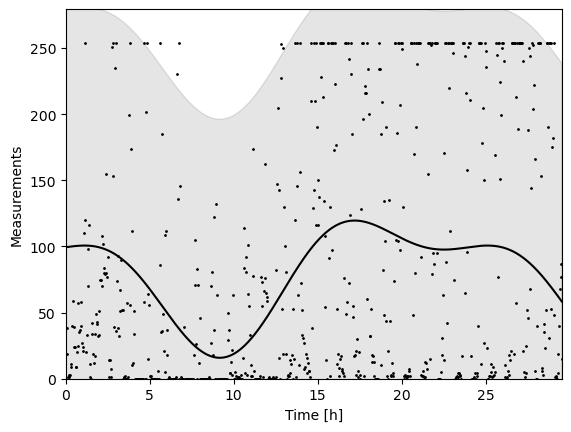

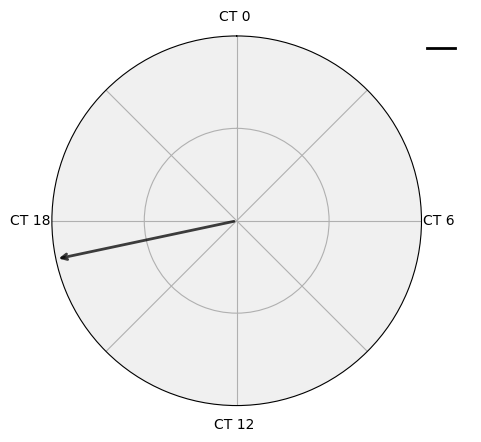

In [17]:
cosinor_regression(pre_data)

In [ ]:
def cosinor_regression(df):
    df["test"] = df[df["Pattern A Channel 2"]]
    df.groupby("hour")
    print(df)


def plot_metric(pre, post, metric, ylabel):
    plt.figure(figsize=(12, 4))
    plt.plot(pre[metric], label='Pre')
    plt.plot(range(len(pre), len(pre)+len(post)), post[metric], label='Post')
    plt.axvline(len(pre), color='magenta', linestyle='--', label='Stimulus')
    plt.xlabel('Day')
    plt.ylabel(ylabel)
    plt.title(f'Daily {ylabel}')
    plt.legend()
    plt.show()

def boxplot_metric(pre, post, metric, ylabel):
    plt.figure(figsize=(6, 4))
    plt.boxplot([pre[metric], post[metric]], labels=['Pre', 'Post'])
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} Distribution')
    plt.show()

def print_summary(pre, post, metric, label):
    print(f'{label} Summary:')
    print(f'  Pre:  mean={pre[metric].mean():.2f}, std={pre[metric].std():.2f}, min={pre[metric].min():.2f}, max={pre[metric].max():.2f}')
    print(f'  Post: mean={post[metric].mean():.2f}, std={post[metric].std():.2f}, min={post[metric].min():.2f}, max={post[metric].max():.2f}')

def plot_event_heatmap(matrix, title):
    plt.figure(figsize=(14, 6))
    ax = plt.imshow(matrix.values.T, aspect='auto', cmap='viridis', origin='lower')
    plt.colorbar(ax, label='Event Count')
    plt.xlabel('Days')
    plt.ylabel('Time of Day (hour)')
    plt.title(title)
    plt.show()

# ---- MAIN ANALYSIS ----
PRE_PATH = 'data/RNS_G_Pre_output.csv'
POST_PATH = 'data/RNS_G_M1_output.csv'
EVENT_COL = 'Pattern A Channel 2'
MIN_VALID_HOURS = 12

pre_matrix = load_and_reshape(PRE_PATH, EVENT_COL, MIN_VALID_HOURS)
post_matrix = load_and_reshape(POST_PATH, EVENT_COL, MIN_VALID_HOURS)

pre_results = daily_cosinor(pre_matrix)
post_results = daily_cosinor(post_matrix)

# Only analyze and plot R2
for metric, label in zip(['R2'], ['R²']):
    plot_metric(pre_results, post_results, metric, label)
    boxplot_metric(pre_results, post_results, metric, label)
    print_summary(pre_results, post_results, metric, label)
    print('-'*40)

plot_event_heatmap(pd.concat([pre_matrix, post_matrix]), 'Event Detections Heatmap (Pre + Post)')

KeyError: "None of [Index([ 0, 19, 38,  1,  3,  1,  3,  9, 11, 40,\n       ...\n        1,  2,  0,  4, 19, 40, 68, 87, 77, 15],\n      dtype='int64', length=710)] are in the [columns]"

### Plots and Analysis